# BREAST CANCER TUMOR DATASET

#### importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### load data from csv file

In [3]:
cell_df = pd.read_csv("cell_samples.csv")
cell_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
cell_df.tail()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [5]:
cell_df

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [6]:
cell_df.shape

(699, 11)

In [7]:
cell_df.size

7689

In [8]:
cell_df["Class"].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [9]:
cell_df["Clump"].value_counts()

1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: Clump, dtype: int64

In [10]:
cell_df.groupby("Clump")["Class"].value_counts()

Clump  Class
1      2        142
       4          3
2      2         46
       4          4
3      2         96
       4         12
4      2         68
       4         12
5      2         85
       4         45
6      4         18
       2         16
7      4         22
       2          1
8      4         42
       2          4
9      4         14
10     4         69
Name: Class, dtype: int64

#### mapping

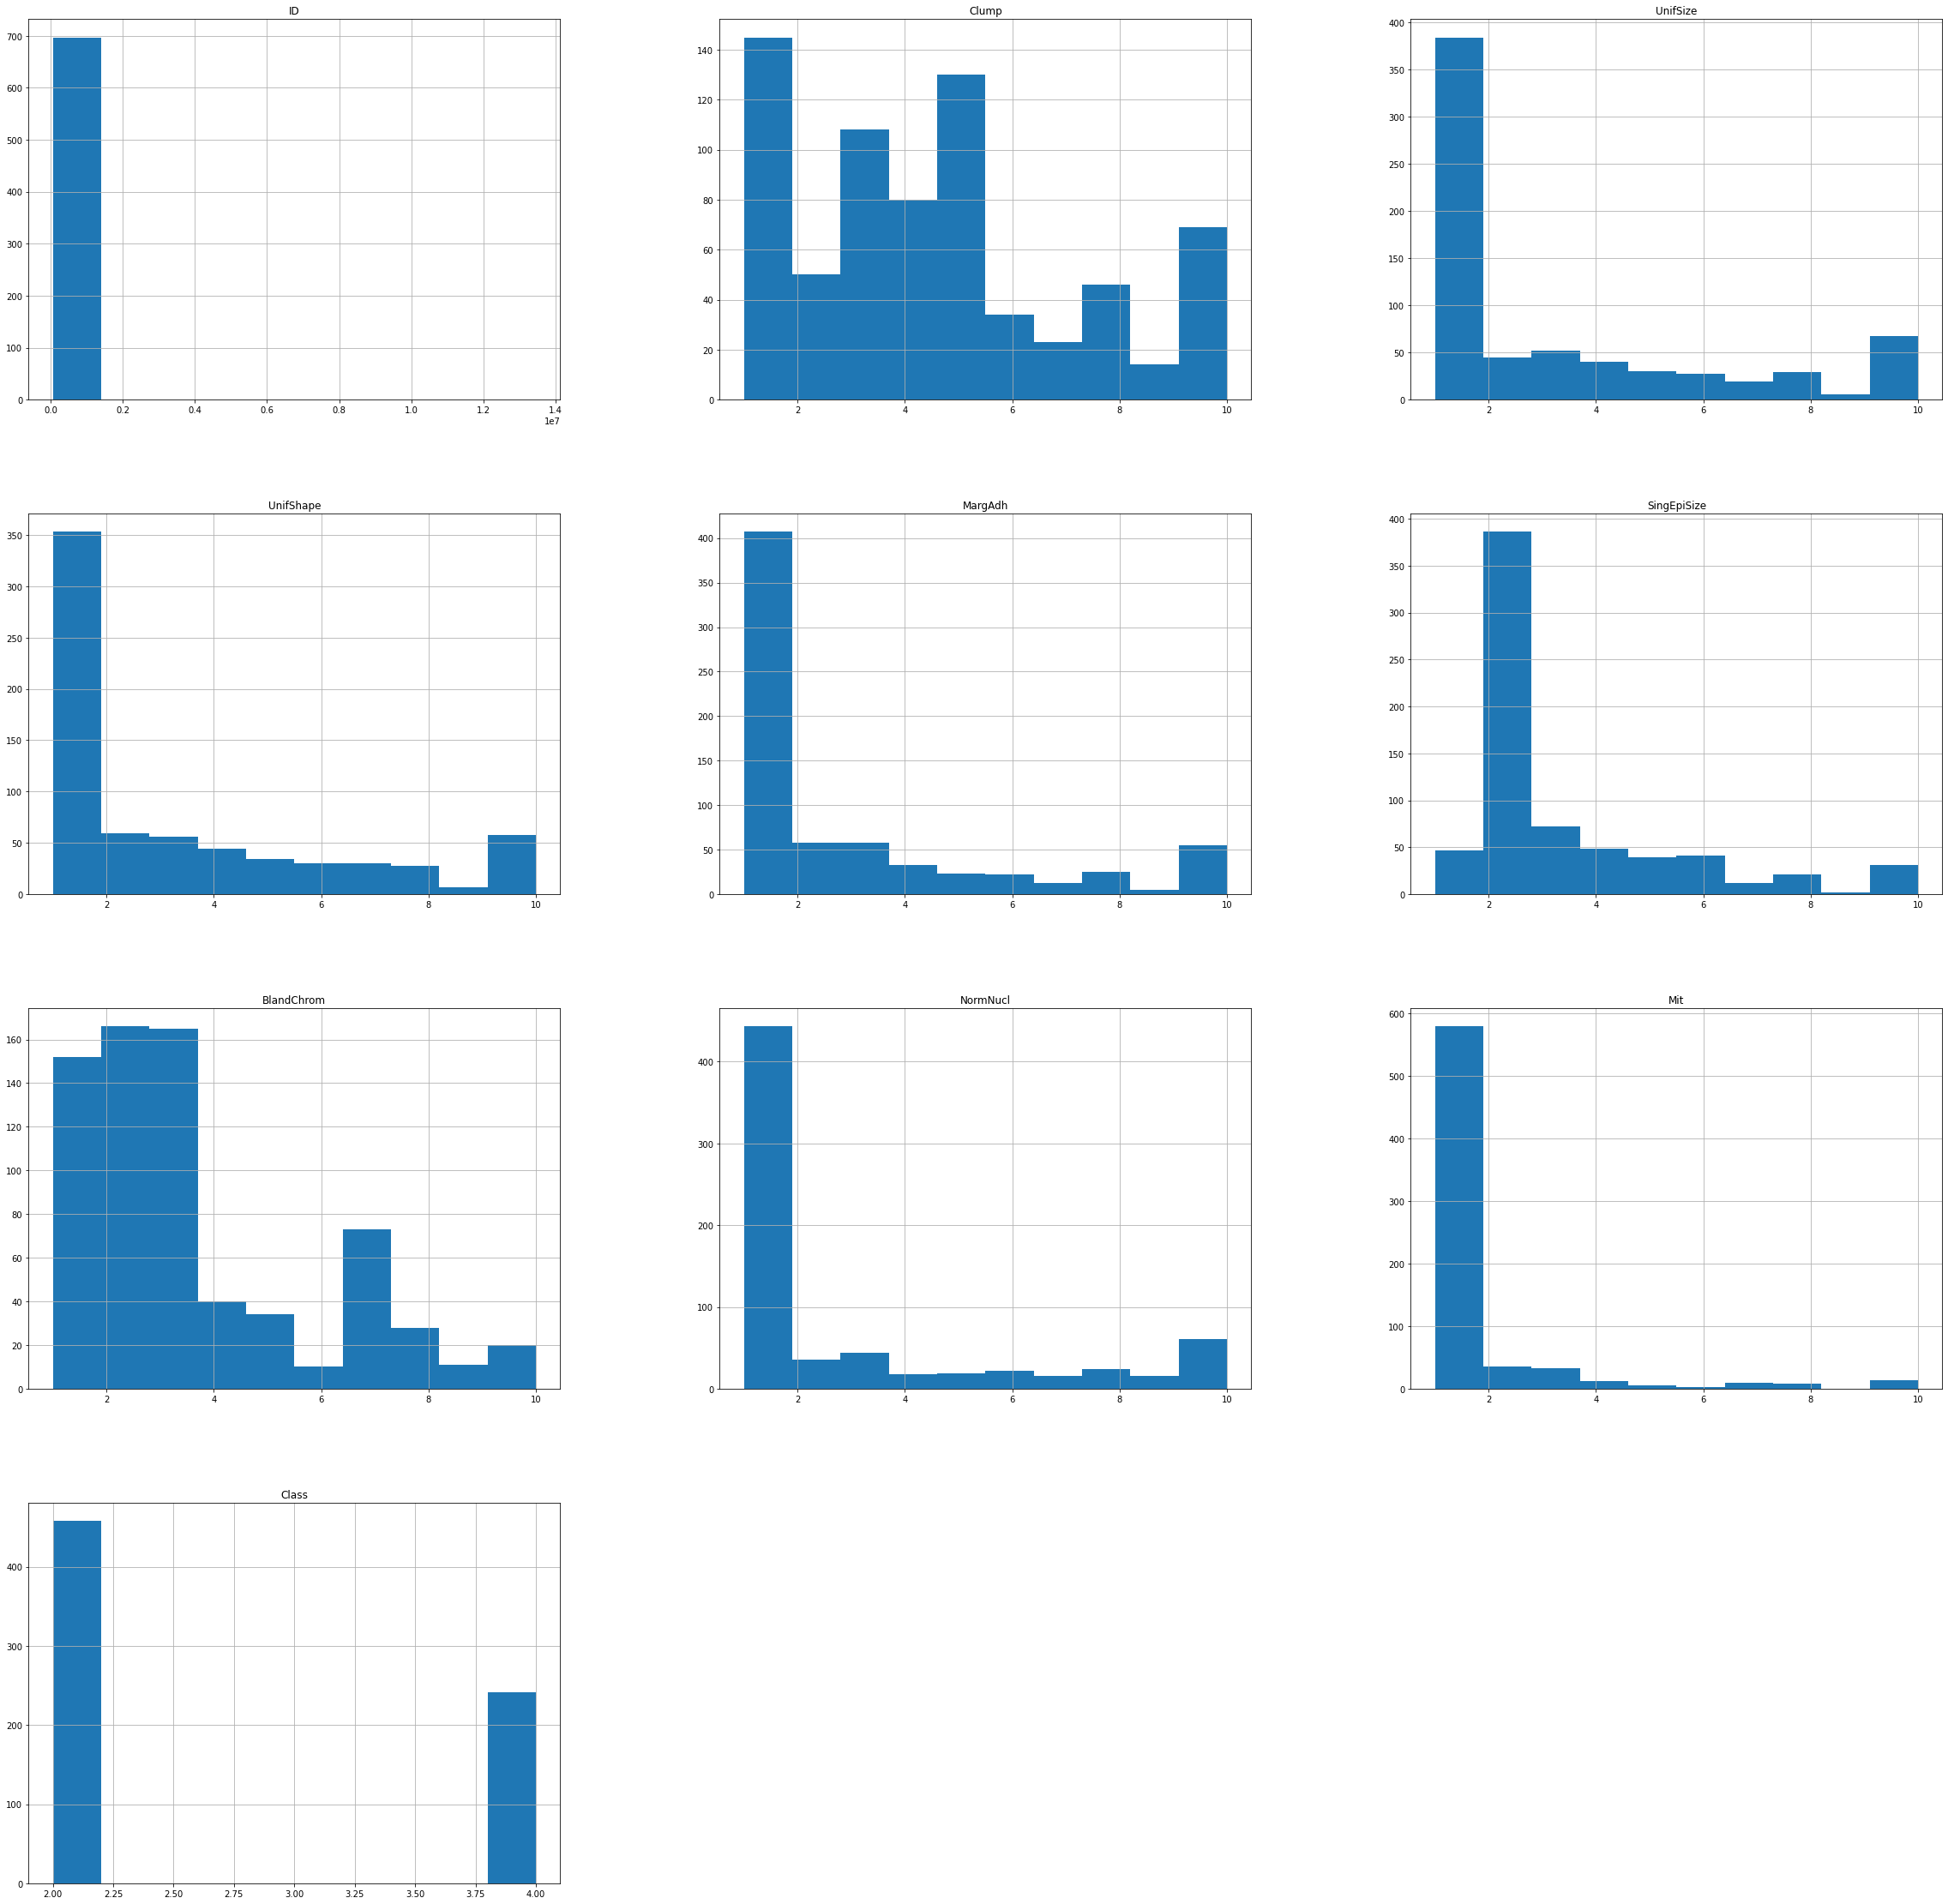

In [11]:
cell_df.hist(figsize=(40,40))
plt.show()

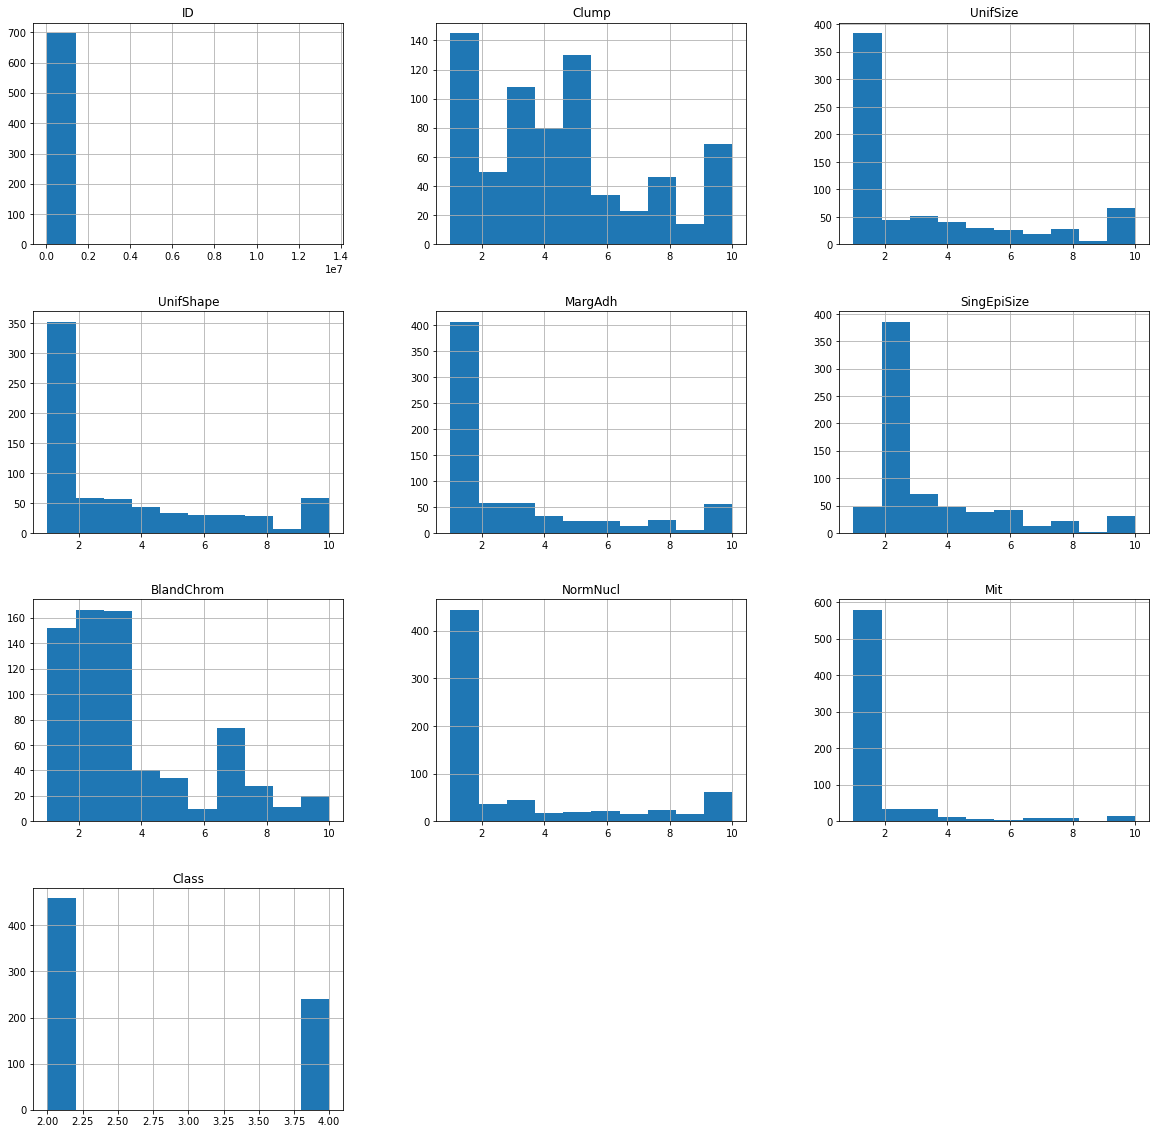

In [12]:

cell_df.hist(figsize=(20,20))
plt.show()

#### Distribution of the classes

<AxesSubplot:xlabel='Clump', ylabel='UnifSize'>

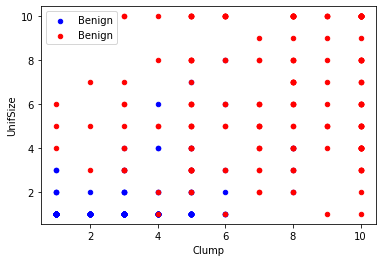

In [17]:
benign_df = cell_df[cell_df["Class"]==2][0:200]
malignant_df = cell_df[cell_df["Class"]==4][0:200]

axes = benign_df.plot(kind ="scatter", x ="Clump", y = "UnifSize", color ="blue", label ="Benign")
malignant_df.plot(kind = "scatter", x = "Clump", y = "UnifSize", color = "Red", label = "Benign", ax = axes)

#### identifying Unwanted Rows

In [18]:
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [25]:
cell_df = cell_df[pd.to_numeric(cell_df["BareNuc"], errors = "coerce").notnull()]
cell_df["BareNuc"]=cell_df["BareNuc"].astype("int")
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

#### Remove Unwanted Columns

In [27]:
# cell_df 100 rows and 11 Columns
# picked Only 9 Columns out of 11

In [26]:
cell_df.columns

feature_df = cell_df[["Clump", "UnifSize", "UnifShape", "MargAdh", "SingEpiSize", "BareNuc", "BlandChrom", "NormNucl", "Mit"]]

In [28]:
# Independent Variable

In [29]:
x = np.asarray(feature_df)

In [30]:
# Dependent variable

In [31]:
y = np.asarray(cell_df["Class"])

In [32]:
x[0:5]
y[0:5]

array([2, 2, 2, 2, 2], dtype=int64)

#### Divide the data as Train/Test dataset

In [33]:
"""cell_df(100)--> Train(80 rows) / Test(20 rows)
Train(x,y) ## X itself is a 2D Array. ## Y is 1D
Test(x,y)"""

'cell_df(100)--> Train(80 rows) / Test(20 rows)\nTrain(x,y) ## X itself is a 2D Array. ## Y is 1D\nTest(x,y)'

#### importing train_test_split

In [35]:
from sklearn.model_selection import train_test_split

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2, random_state = 4)

In [39]:
x_train.shape

(546, 9)

In [40]:
y_train.shape

(546,)

In [41]:
x_test.shape

(137, 9)

In [42]:
y_test.shape

(137,)

#### Modelling(SVM With Scikit_learn)

In [50]:
from sklearn import svm

In [52]:
classifier = svm.SVC(kernel = "linear", gamma = "auto", C=2)
classifier.fit(x_train, y_train)

y_predict = classifier.predict(x_test)

#### Evaluation (Result)

In [53]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



the accuracy score is: 96.35036496350365


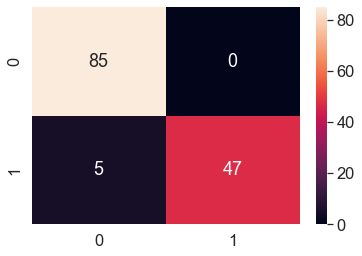

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix
acc = accuracy_score(y_test, y_predict)*100
print(f"the accuracy score is: {acc}")
sns.set(font_scale=1.5)
cm = confusion_matrix( y_predict, y_test)
sns.heatmap(cm, annot=True, fmt="g")
plt.show()